# Entraînement d'un réseau seq2seq sur des séries temporelles

Le plan de match est d'abord d'entraîner un tel réseau sur un tout petit dataset de 2 signaux sinusoidaux simples, puis de tenter de prédire des signaux de plus en plus complexes et de natures un peu différente. 

## Exercices

Note: le dataset change en fonction de l'exercice, et en conséquence, la structure du réseau de neurone changera aussi pour s'adapter, de façon automatique selon la section `Paramètres du réseau de neuronne` plus bas. Il restera au participant de modifier d'avantage ces paramètres afin de réellement pouvoir prédire le signal correctement. 

### Exercice 1

En théorie, il est possible pour cet exercice de créer une estimation parfaite du signal (excepté certaines erreurs d'arrondi et différences minimes). Cet exercice est surtout pour s'approprier le code et explorer le fonctionnement de seq2seq au niveau des dimensions et du lien avec le code avec TensorFlow avant de passer aux exercices suivants. 

Nous avons 2 séries temporelles différentes en parallèle à prédire: notre réseau de neurones est multidimensionnel car il prédit plusieurs séries à la fois. Ainsi, à chaque étape de temps, un encodeur accepte en argument 2 valeurs de "hauteur" d'un signal. Ici, pour l'exercice 1, c'est simple: on a un sinus et son cosinus en entrée dans l'encodeur pour 10 étapes de temps, et il faut prédire les 10 prochaines étapes de temps par le biais du décodeur. Plus de détails sur ce signal se trouvent dans le fichier `datasets.py` où la fonction pour ce dataset est définie. 

L'exercice 1 devrait fonctionner du premier coup avec le code actuel. Le code a été fait de façon à être améliorable afin de mieux résoudre cet exercice, quoiqu'il est possible de passer à l'exercice 2 directement aussi. 

### Exercice 2

Cet exercice ressemble beaucoup à l'exercice 1. Ici on a un seul signal à prédire plutôt que 2 en même temps, cependant ce signal est plus compliqué à prédire. C'est une combinaison de plusieurs fréquences, et ces fréquences peuvent varier. 

En plus du fait que les longeurs d'onde peuvent varier dans ce signal, j'y ai aussi ajouté un peu de bruit: des oscillations hasardeuses néfastes. Le but est donc de prédire la suite de ce signal, et cette prédiction doir faire comme si le bruit néfaste n'existait pas. 

Pour réussir l'exercice 2, il sera nécessaire de modifier certains paramètres du réseau de neurones. Indice: augmenter le nombre de neurones, le nombre d'étapes d'entrainement, et au besoin revoir les hyperparamètres de l'optimisation. Pour les motivés, il serait possible de détacher le décodeur de l'encodeur en utilisant des cellules différentes, et aussi d'ajouter du feedback dans le décodeur (envoyer les prédictions en tant qu'entrée suivante dans le temps). 

### Exercice 3

Pour l'exercice 3, le problème est beaucoup plus difficile que pour les exercices précédents. Il s'agit de prédire les valeures futures pour le Bitcoin. Comme pour l'exercice 1, on a 2 signaux en entrées et aussi 2 signaux en sortie: ce sont les valeurs BTC/USD et BTC/EUR au travers du temps, soit des historiques de valeurs du Bitcoin par rapport au dollar américain et au euro. Le Bitcoin est une cryopto-monnaie et n'est pas une monnaie officielle, mais cela ne l'empêche pas d'avoir une valeur qui varie pour faire des échanges, au même titre que les monnaies normales. 

En réalité, il faudrait utiliser des données beaucoup plus abondantes et massives (par exemple, un historique de prix aux minutes plutôt qu'aux jours). Présentement, il serait très difficile de créer un prédicteur correct à cause des limitations actuelles sur le jeu de données fourni, mais le problème reste intéressant. 

Des ajouts possibles aux deux dimensions d'entrées (BTC/USD et BTC/EUR) seraient de créer des dimensions supplémentaires contenant des ondes sinusoidales (ou des ondes triangulaires ou en scie, etc) qui cyclent avec les heures, les jours, les mois, les années et les lunes, etc. Il serait aussi intéressant d'obtenir d'autres signaux, tels que des signaux de température sur plusieurs dimensions différentes pour différents emplacements dans le monde, etc. Beaucoup de sources de données pourraient être aggrégées et combinées avec d'autres données financières. D'autres données fiancières pourraient être très utiles, par exemple, le Dow Jones et le S&P 500.

Avec les exemples mentionnés, il serait possible d'avoir des données en entrées à N dimensions (BTC/USD, BTC/EUR, Dow_Jones, SP_500, heures, jours, semaines, mois, années, lunes, meteo_USA, meteo_EUROPE, meteo_ASIE), et 2 dimensions de sortie pour les prédictions (BTC/USD, BTC/EUR). 

Ces concepts peuvent s'appliquer à plusieurs problèmes. Par exemple, actuellement les réseaux de neurones sont présentement utilisés pour faire des prédiction météorologiques. 

### Exercice 4

Il serait possible de créer un modèle de langage au niveau des caractères tel que dans cet article: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

Hélas, en 1 heure cela ne serait pas possible. Il est laissé en bonus au participant de continuer ce projet par lui même par la suite. Cependant, il faut être averti: ce projet serait difficile à réaliser sans le matériel requis: une installation de TensorFlow qui fait les calculs sur la carte graphique ET avoir une bonne carte graphique. Je recommanderais d'utiliser les instances g2.xlarge et p2.xlarge d'Amazon AWS EC2. 


## Pour décider de l'exercice à faire, changer la valeur de la variable suivante, nommée "exercice" :


In [1]:
exercice = 1
# Valeurs possibles : 1, 2, ou 3. 

from datasets import generate_x_y_data_v1, generate_x_y_data_v2, generate_x_y_data_v3 

# Ici, on donne un nouveau nom à une fonction utilisée partout plus bas selon l'exercice choisi. 
if exercice == 1:
    generate_x_y_data = generate_x_y_data_v1
if exercice == 2:
    generate_x_y_data = generate_x_y_data_v2
if exercice == 3:
    generate_x_y_data = generate_x_y_data_v3

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Pour le iPython notebook, les graphiques
# sont visibles à l'intérieur. 
%matplotlib inline

## Paramètres du réseau de neuronne

In [3]:

sample_x, sample_y = generate_x_y_data(isTrain=True, batch_size=1)
print "Dimensions du jeux de données pour un X et un Y : "
# (seq_length, batch_size, output_dim)
print sample_x.shape
print sample_y.shape

# Neural net's parameters
seq_length = sample_x.shape[0]  # Inputs and outputs are sequences of same lenght
batch_size = 5  # Keeping it simple for now

# Each unit in the sequence is a float32 vector of lenght 10:
# Same dimension sizes just for simplicity now
output_dim = input_dim = sample_x.shape[-1]
hidden_dim = 12
layers_stacked_count = 2

# Optmizer: 
learning_rate = 0.007  # Small lr to avoid problem
nb_iters = 100  # Crank up the iters in consequence
lr_decay = 0.92  # 0.9 default
momentum = 0.5  # 0.0 default
lambda_l2_reg = 0.003


Dimensions du jeux de données pour un X et un Y : 
(10, 1, 2)
(10, 1, 2)


## Définition de l'architecture neuronale à la seq2seq

<img src="https://www.tensorflow.org/images/basic_seq2seq.png" />

Dans notre cas, comparativement à dans cette image, nous avons en entrée des données de signaux. Aussi, nous n'avons pas une boucle de feedback pour le décodeur: Notre décodeur a en entrée seulement le symbole \<GO\> suivi de la dernière valeurs de signal envoyées à l'encodeur, à répétition. Cela pourrait être modifié afin d'inclure proprement un feedback des prédictions dans la prochaine entrée dans le temps. 

Spécialement dans notre cas aussi, afin de simplifier le modèle, nous avons la même cellule récurrente pour l'encodeur et le décodeur, plutôt qu'une cellule différente indépendante, ce qui est plus simple. 

In [4]:

tf.reset_default_graph()
# sess.close()
sess = tf.InteractiveSession()

with tf.variable_scope('Seq2seq'):

    # Entrées dans l'encodeur
    enc_inp = [
        tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
           for t in range(seq_length)
    ]

    # Sorties attendues du décodeur
    expected_sparse_output = [
        tf.placeholder(tf.float32, shape=(None, output_dim), name="expected_sparse_output_".format(t))
          for t in range(seq_length)
    ]
    
    # Donner un symbole de départ "GO" au décodeur, et toujours la derniere valeur de l'encodeur
    dec_inp = [ tf.zeros_like(enc_inp[0], dtype=np.float32, name="GO") ] + enc_inp[:-1]

    # Créer un nombre `layers_stacked_count` de RNN empilés
    cells = []
    for i in range(layers_stacked_count):
        with tf.variable_scope('RNN_{}'.format(i)):
            # GRU est similaire au LSTM, 
            # mais pas exactement pareil à l'intérieur: 
            cells.append(tf.nn.rnn_cell.GRUCell(hidden_dim))
    cell = tf.nn.rnn_cell.MultiRNNCell(cells)
    
    # Adapter les dimensions des entrees et sorties pour le RNN seq2seq: 
    w_in = tf.Variable(tf.random_normal([input_dim, hidden_dim]))
    b_in = tf.Variable(tf.random_normal([hidden_dim], mean=1.0))
    w_out = tf.Variable(tf.random_normal([hidden_dim, output_dim]))
    b_out = tf.Variable(tf.random_normal([output_dim]))
    
    reshaped_inputs = [tf.nn.relu(tf.matmul(i, w_in) + b_in) for i in enc_inp]
    
    # Ici, l'encodeur et le décodeur
    # utilisent les mêmes poids pour la cellule: 
    dec_outputs, dec_memory = tf.nn.seq2seq.basic_rnn_seq2seq(
        enc_inp, 
        dec_inp, 
        cell
    )
    
    output_scale_factor = tf.Variable(1.0, name="Output_ScaleFactor")
    # Sortie finale du réseau de neurones, avec une transformation linéaire:
    reshaped_outputs = [output_scale_factor*(tf.matmul(i, w_out) + b_out) for i in dec_outputs]
    

In [5]:

# Training loss and optimizer

with tf.variable_scope('Loss'):
    # L2 loss
    output_loss = 0
    for _y, _Y in zip(reshaped_outputs, expected_sparse_output):
        output_loss += tf.reduce_mean(tf.nn.l2_loss(_y - _Y))
        
    # L2 regularization 
    reg_loss = 0
    for tf_var in tf.trainable_variables():
        if not ("Bias" in tf_var.name or "Output_" in tf_var.name):
            reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))
            
    loss = output_loss + lambda_l2_reg * reg_loss

with tf.variable_scope('Optimizer'):
    optimizer = tf.train.RMSPropOptimizer(learning_rate, decay=lr_decay, momentum=momentum)
    train_op = optimizer.minimize(loss)


In [6]:

def train_batch(batch_size):
    """
    Training step: we optimize for every outputs Y at once, 
    feeding all inputs X
    
    I do not know yet how to deal with 
    the enc_inp tensor declared earlier
    """
    X, Y = generate_x_y_data(isTrain=True, batch_size=batch_size)

    feed_dict = {
        enc_inp[t]: X[t] for t in range(len(enc_inp))
    }
    feed_dict.update({expected_sparse_output[t]: Y[t] for t in range(len(enc_inp))})

    _, loss_t = sess.run([train_op, loss], feed_dict)
    return loss_t


# Train
train_losses = []

sess.run(tf.global_variables_initializer())
for t in range(nb_iters+1):
    loss_t = train_batch(batch_size)
    train_losses.append(loss_t)
    if t % 10 == 0: 
        print "Step {}/{}, loss: {}".format(t, nb_iters, loss_t)

print "Final loss: {}".format(loss_t)


Step 0/100, loss: 94.540687561
Step 10/100, loss: 1.4749301672
Step 20/100, loss: 0.718863725662
Step 30/100, loss: 1.58980727196
Step 40/100, loss: 2.26964735985
Step 50/100, loss: 0.396805584431
Step 60/100, loss: 0.563470125198
Step 70/100, loss: 0.38940268755
Step 80/100, loss: 0.770659208298
Step 90/100, loss: 0.472346484661
Step 100/100, loss: 0.391462266445
Final loss: 0.391462266445


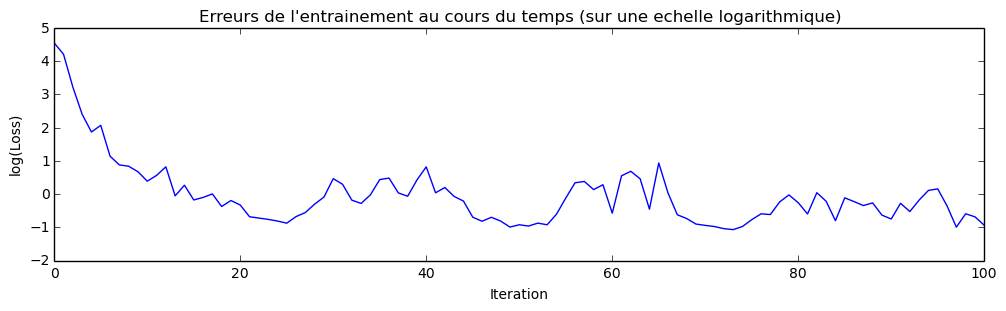

In [7]:
plt.figure(figsize=(12, 3))
plt.plot(np.log(train_losses), label="Loss")
plt.title("Erreurs de l'entrainement au cours du temps (sur une echelle logarithmique)")
plt.xlabel('Iteration')
plt.ylabel('log(Loss)')
plt.show()

Visualisons 5 prédictions quelconques avec nos signaux :


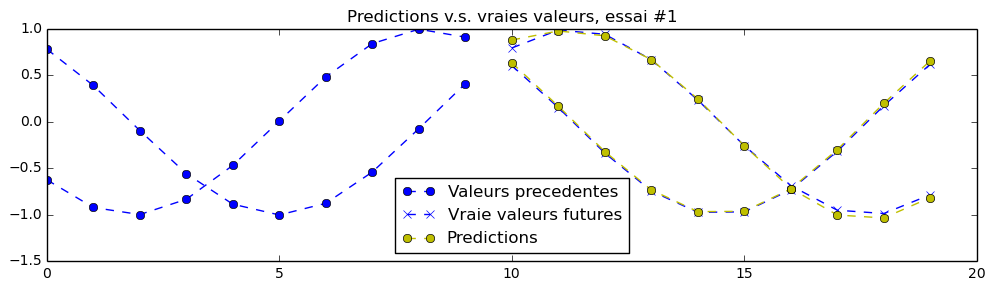

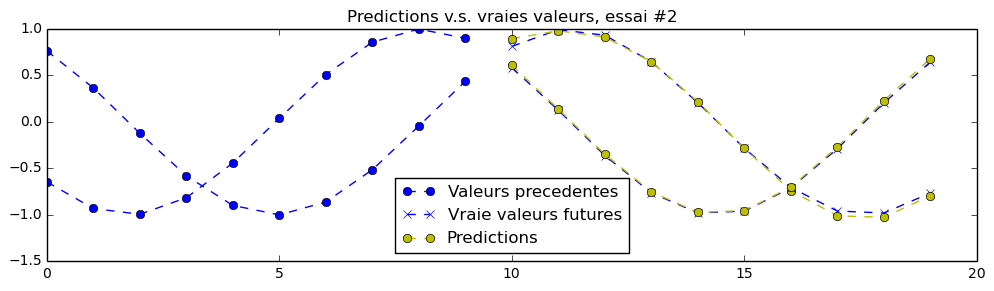

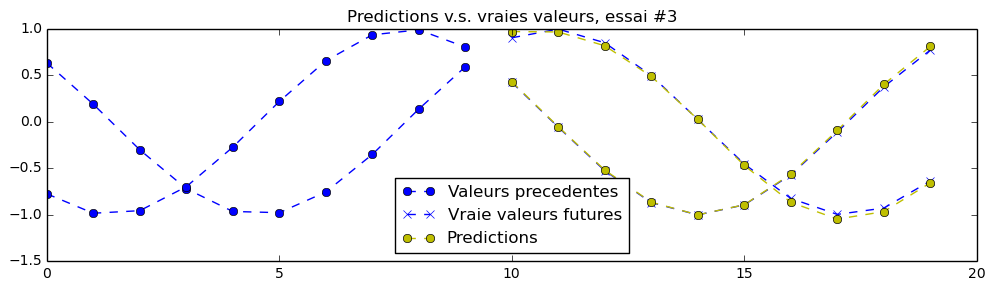

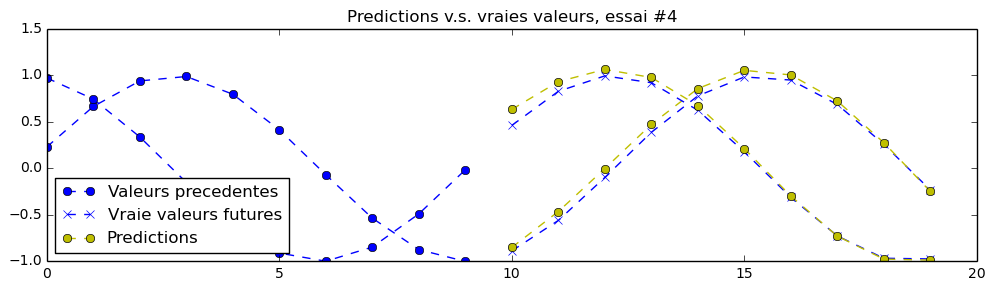

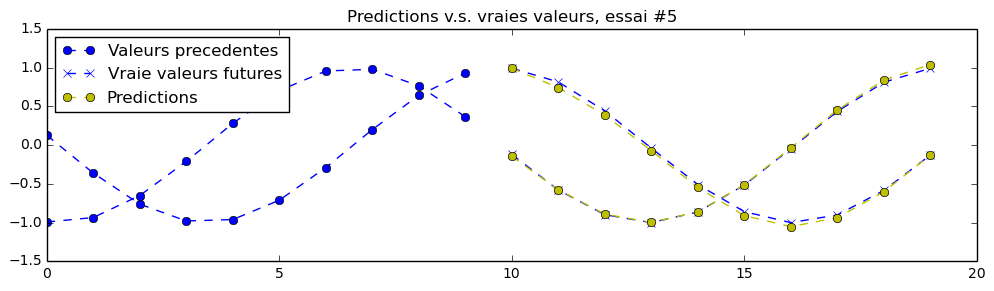

Le signal peut contenir plusieurs dimensions en sortie à la fois.
Si c'est le cas, les signaux sont empilés avec la même couleur.
En vrai, on pourrait imaginer plusieurs symboles boursiers évoluant dans le
même référentiel de temps, analysés en même temps par le même réseau de neurones.


In [8]:
# Tester
nb_predictions = 5
print "Visualisons {} prédictions quelconques avec nos signaux :".format(nb_predictions)

X, Y = generate_x_y_data(isTrain=True, batch_size=nb_predictions)
feed_dict = {enc_inp[t]: X[t] for t in range(seq_length)}
outputs = sess.run([reshaped_outputs], feed_dict)

for j in range(nb_predictions): 
    plt.figure(figsize=(12, 3))
    
    for k in range(output_dim):
        past = X[:,j,k]
        expected = Y[:,j,k]
        pred = np.array(outputs[0])[:,j,k]
        label1 = "Valeurs precedentes" if k==0 else "_nolegend_"
        label2 = "Vraie valeurs futures" if k==0 else "_nolegend_"
        label3 = "Predictions" if k==0 else "_nolegend_"
        plt.plot(range(len(past)), past, "o--b", label=label1)
        plt.plot(range(len(past), len(expected)+len(past)), expected, "x--b", label=label2)
        plt.plot(range(len(past), len(pred)+len(past)), pred, "o--y", label=label3)
    
    plt.legend(loc='best')
    plt.title("Predictions v.s. vraies valeurs, essai #{}".format(j+1))
    plt.show()

print "Le signal peut contenir plusieurs dimensions en sortie à la fois."
print "Si c'est le cas, les signaux sont empilés avec la même couleur."
print "En vrai, on pourrait imaginer plusieurs symboles boursiers évoluant dans le"
print "même référentiel de temps, analysés en même temps par le même réseau de neurones."